## Non-Linear Regression Analysis

If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression.

+ this notebook is about some non-linear data distribution and related model development methods

Dataset:  China's GDP from 1960 to 2014.

Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

+ Eventhough Linear Regression is a very good method to solve problems, it cannot be applied over any datasets.

+ There will be datasets which will not hold with linear model.

+ Some Non linear Data Distributions of Data.

Linear Distribution:
+ Form **Y = 2*X + 3**

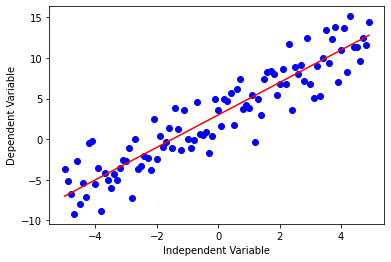

In [3]:
x = np.arange(-5.0,5.0,0.1)

y = 2*x + 3
y_noise = 2*np.random.normal(size = x.size)
ydata = y + y_noise

plt.plot(x,ydata,"bo")
plt.plot(x,y,"r")
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")
plt.show()

Cubic Function
+ form  Y = 1*(X**3) + 1*(X**2) + 1*X + 3

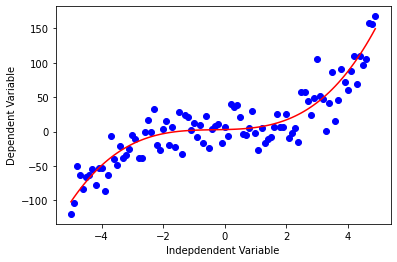

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Quadratic Function
+ **Y = X^2**

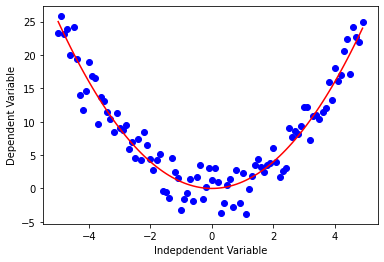

In [5]:
x = np.arange(-5.0, 5.0, 0.1)


y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Exponential
+ **Y = a + bc^X**

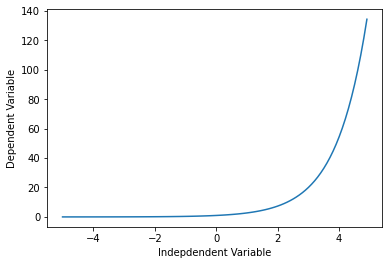

In [6]:
X = np.arange(-5.0, 5.0, 0.1)


Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Logarithmic
+ **Y = log(X)**

<ipython-input-7-0b6a51fd782b>:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


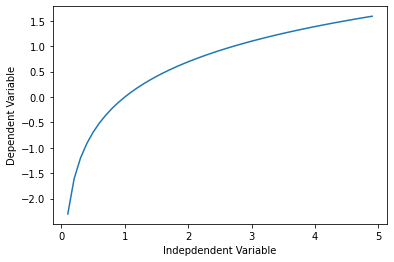

In [7]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Sigmoidal/Logistic
+ $$ Y = a + \frac{b}{1+ c^{(X-d)}}$$


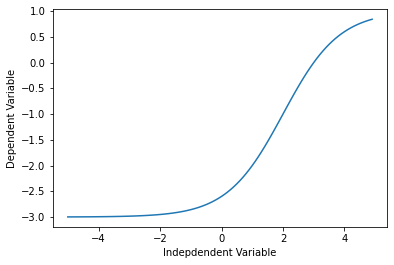

In [8]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))


plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Regression Example.

Fit a non-lnear model to the datapoints corresponding to China's GDP from 1960 to 2014.

In [9]:
import numpy as np
import pandas as pd

In [14]:
path = r"H:\ML Algorithms\Non-Linear Regression\china_gdp.csv"
data = pd.read_csv(path)
data.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


Plotting the Dataset

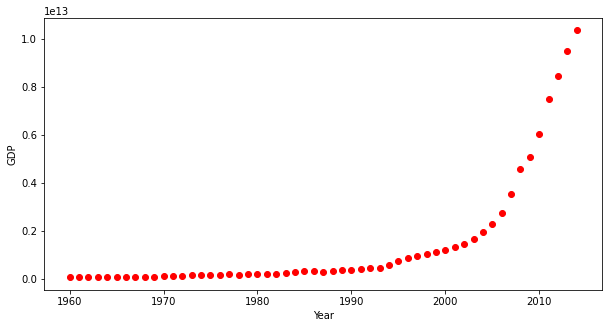

In [16]:
plt.figure(figsize = (10,5))
x_data, y_data = (data["Year"].values, data["Value"].values)
plt.plot(x_data, y_data, "ro")
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

+ its look like either logistic or exponential function.
+ the growth starts off slow, then from 2005 onwards,the growth is very significant.
+ finally, it deccelerates slightly in 2010 s.

Choosing a Model

+ Since the graph is look like logistic function, logistic regression model would be a good choice.

+ it has a property of starting with a slow growth.
+ increase growth in the middle
+ decreasing growth at the end.

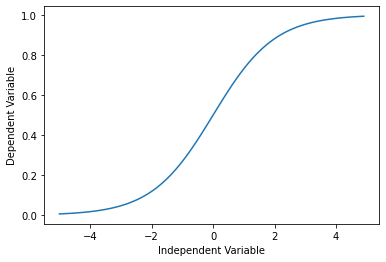

In [17]:
X = np.arange(-5.0,5.0,0.1)
Y = 1.0/(1.0 + np.exp(-X))

plt.plot(X,Y)
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")
plt.show()

The formula for the logistic function is
+ $$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

+ $\beta_1$: Controls the curve's steepness,

+ $\beta_2$: Slides the curve on the x-axis.

Building the Model

Build the regression model and initialize its parameters

In [18]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

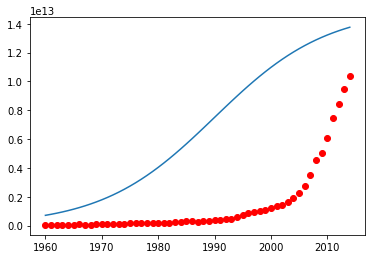

In [19]:
beta_1 = 0.10
beta_2 = 1990.0

## logistic function ##
Y_pred = sigmoid(x_data, beta_1 , beta_2)

## plot initial prediction against datapoints ##
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

The regression line is not fitting the datapoints
+ The task is to find the best parameters for the model.

In [20]:
## Normalize the Data ##
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

+ use "curve_fit" which uses non-linear squares to fit our sigmoid function to datapoints.

In [21]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
## print the final parameters ##
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


Plotting Resulting Regression Model

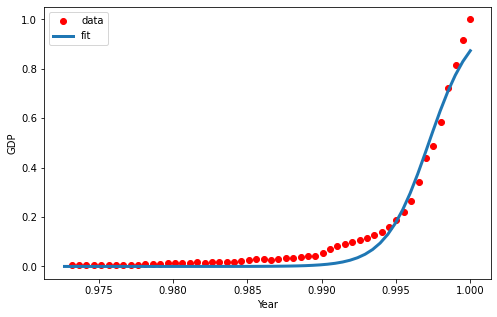

In [22]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Calculating the Accuracy of the Model

In [27]:
## split data into train/test ##
dframe = np.random.rand(len(data)) < 0.7
train_x = xdata[dframe]
test_x = xdata[~dframe]
train_y = ydata[dframe]
test_y = ydata[~dframe]

## build the model using train set ##
popt, pcov = curve_fit(sigmoid, train_x, train_y)

## predict using test set ##
y_out = sigmoid(test_x, *popt)

# evaluation
print("MSE:",np.mean(np.absolute(y_out - test_y)))
print("RMSE:",np.mean((y_out - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score",r2_score(y_out , test_y) )



MSE: 0.04280708867387599
RMSE: 0.0028156828824833398
R2-score 0.9150877724975568


+ R2-score is 0.91.
+ So the model is performing well.
+ And can be dependable.